- 참조
  - 송정현 교수
  - https://github.com/jhsongok/Custom_YOLO8
  - https://www.youtube.com/watch?v=PjKKjN20oYw&list=WL&index=23&t=

#1.Roboflow Dataset
- https://public.roboflow.com/object-detection

In [ ]:
!curl -L "https://public.roboflow.com/ds/ME38kAmHkO?key=HcviQhsWax" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   1167      0 --:--:-- --:--:-- --:--:--  1166
100 66.9M  100 66.9M    0     0  9921k      0  0:00:06  0:00:06 --:--:-- 15.1M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg  
 extracting: test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg  
 extracting: test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg  
 extracting: test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg  
 extracting: test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg  
 extracting: test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c30584

# 2.Custom yaml 파일 만들기
- 필요시 설치 : !pip install PyYAML

In [ ]:
import yaml

data_cf = {'train' : '/content/train/images',
           'val' : '/content/valid/images',
           'test' : '/content/test/images',
           'names' : ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'],
           'nc' : 7 }

# Aquarium_data.yaml 이란 이름으로 custom yaml 파일을 만든다.
with open('/content/Aquarium_data.yaml', 'w') as f:
  yaml.dump(data_cf, f)

# Aquarium_data.yaml 확인
with open('/content/Aquarium_data.yaml', 'r') as f:
  fruit_yaml = yaml.safe_load(f)
  display(fruit_yaml)

{'names': ['fish',
  'jellyfish',
  'penguin',
  'puffin',
  'shark',
  'starfish',
  'stingray'],
 'nc': 7,
 'test': '/content/test/images',
 'train': '/content/train/images',
 'val': '/content/valid/images'}

# 3.YOLOv8을 사용하기 위한 SetUP

In [ ]:
# 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import ultralytics
from ultralytics import YOLO
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO

# yolov8n.pt 모델의 아키텍처와 가중치을 함께 불러옴
model=YOLO('yolov8n.pt')

# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))

# 모델이 분류할 수 있는 부류 확인
print(model.names)

100%|██████████| 6.25M/6.25M [00:00<00:00, 334MB/s]

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

# 4.모델 아키텍처를 이용하여 Custom Dataset으로 학습


In [ ]:
model.train(data='/content/Aquarium_data.yaml', epochs=30, batch=16, imgsz=640)  # 학습시 640×640 / epochs=100

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Aquarium_data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 755k/755k [00:00<00:00, 127MB/s]

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,012,213 parameters, 3,012,197 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 387MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 76.0±105.5 MB/s, size: 75.9 KB)


train: Scanning /content/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:01<00:00, 403.65it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 14.9±3.1 MB/s, size: 97.4 KB)


val: Scanning /content/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 335.66it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.25G      1.529      3.823      1.283        196        640: 100%|██████████| 28/28 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        127        909     0.0121      0.473     0.0657     0.0371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.73G       1.63       2.61      1.288        194        640: 100%|██████████| 28/28 [00:09<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        127        909      0.406      0.267      0.275      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.75G       1.61      2.214      1.293        198        640: 100%|██████████| 28/28 [00:08<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        127        909      0.377      0.216      0.232      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.77G      1.523      2.083      1.243        126        640: 100%|██████████| 28/28 [00:07<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        127        909      0.318      0.357      0.353      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.79G      1.535      1.892      1.256        210        640: 100%|██████████| 28/28 [00:08<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        127        909      0.464      0.396      0.386      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       2.8G      1.511      1.774      1.235        186        640: 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        127        909      0.505      0.463      0.413      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.82G      1.507      1.701      1.232        200        640: 100%|██████████| 28/28 [00:09<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        127        909       0.53      0.523      0.519      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.84G      1.464      1.633      1.207        340        640: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        127        909      0.534      0.491      0.525      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.85G      1.461      1.577      1.209        173        640: 100%|██████████| 28/28 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        127        909      0.595      0.549      0.569      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.87G      1.429      1.507      1.206        271        640: 100%|██████████| 28/28 [00:08<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        127        909      0.591      0.568      0.564      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.89G      1.389      1.508      1.187        192        640: 100%|██████████| 28/28 [00:08<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        127        909      0.651      0.606      0.608       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       2.9G      1.397      1.424      1.184        186        640: 100%|██████████| 28/28 [00:09<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        127        909       0.64      0.569       0.61       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.92G      1.396      1.382      1.178        111        640: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        127        909      0.722      0.599      0.651      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.94G      1.362      1.356      1.176        137        640: 100%|██████████| 28/28 [00:09<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        127        909       0.67      0.601      0.627      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.96G      1.386      1.381      1.181        163        640: 100%|██████████| 28/28 [00:08<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        127        909      0.676      0.635      0.666      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.97G      1.364      1.277      1.158        236        640: 100%|██████████| 28/28 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        127        909      0.723      0.674      0.706      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.99G      1.341      1.261      1.149        158        640: 100%|██████████| 28/28 [00:08<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        127        909      0.687       0.63      0.689      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.01G      1.305      1.199      1.134        160        640: 100%|██████████| 28/28 [00:09<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        127        909      0.733      0.653      0.708      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.02G      1.302      1.198      1.127        199        640: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        127        909      0.834      0.612       0.71      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.04G      1.339      1.215      1.135        223        640: 100%|██████████| 28/28 [00:09<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        127        909       0.73      0.669      0.721      0.431


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.06G      1.265      1.261      1.111        138        640: 100%|██████████| 28/28 [00:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        127        909      0.776      0.643      0.721      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.07G      1.257      1.211      1.105        109        640: 100%|██████████| 28/28 [00:08<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        127        909      0.808      0.615      0.714      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.09G      1.245      1.191        1.1         84        640: 100%|██████████| 28/28 [00:07<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        127        909      0.782      0.645      0.725      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.11G      1.216      1.111      1.085         85        640: 100%|██████████| 28/28 [00:08<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        127        909      0.703      0.685      0.716      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.13G      1.213      1.105      1.087         84        640: 100%|██████████| 28/28 [00:08<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        127        909       0.76       0.67       0.73      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.14G      1.192      1.052      1.069         95        640: 100%|██████████| 28/28 [00:08<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        127        909      0.821      0.643      0.744      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.16G      1.211      1.056      1.085        137        640: 100%|██████████| 28/28 [00:08<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        127        909      0.798      0.677      0.754      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.18G      1.172      1.012      1.067        153        640: 100%|██████████| 28/28 [00:07<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        127        909      0.796      0.678       0.75      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       3.2G      1.165       1.01      1.062         99        640: 100%|██████████| 28/28 [00:08<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        127        909       0.76        0.7      0.754       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.21G       1.16     0.9785      1.052         65        640: 100%|██████████| 28/28 [00:09<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        127        909      0.748      0.696      0.759      0.463



30 epochs completed in 0.093 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]


                   all        127        909      0.748      0.696      0.759      0.464
                  fish         63        459      0.756      0.748        0.8      0.457
             jellyfish          9        155      0.827      0.923      0.942      0.536
               penguin         17        104      0.625      0.702      0.697       0.32
                puffin         15         74      0.689        0.5      0.585       0.27
                 shark         28         57      0.756      0.599        0.7       0.47
              starfish         17         27      0.899      0.704      0.814       0.62
              stingray         23         33      0.686      0.697      0.774      0.573
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 10.6ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b19265b9090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

# 5.학습 결과 확인

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

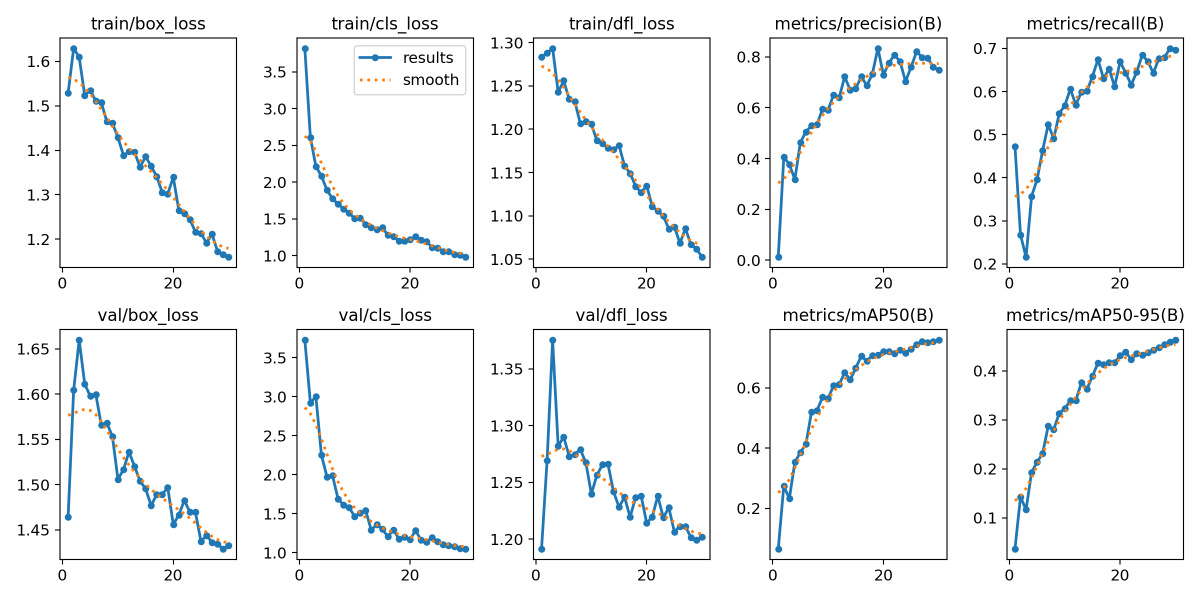

In [ ]:
# 학습 결과를 그래프로 저장한 파일을 통해 확인해 본다
result_img=cv2.imread('/content/runs/detect/train2/results.png')
fix_width=1200
height,width=result_img.shape[:2]
ratio=fix_width / width
demension=(fix_width, int(height*ratio))
result_img=cv2.resize(result_img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(result_img)

# 6.모델 검출

In [ ]:
# 모델 예측
results=model.predict(source='/content/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg', save=True)


image 1/1 /content/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg: 640x480 10 penguins, 42.0ms
Speed: 4.0ms preprocess, 42.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train22


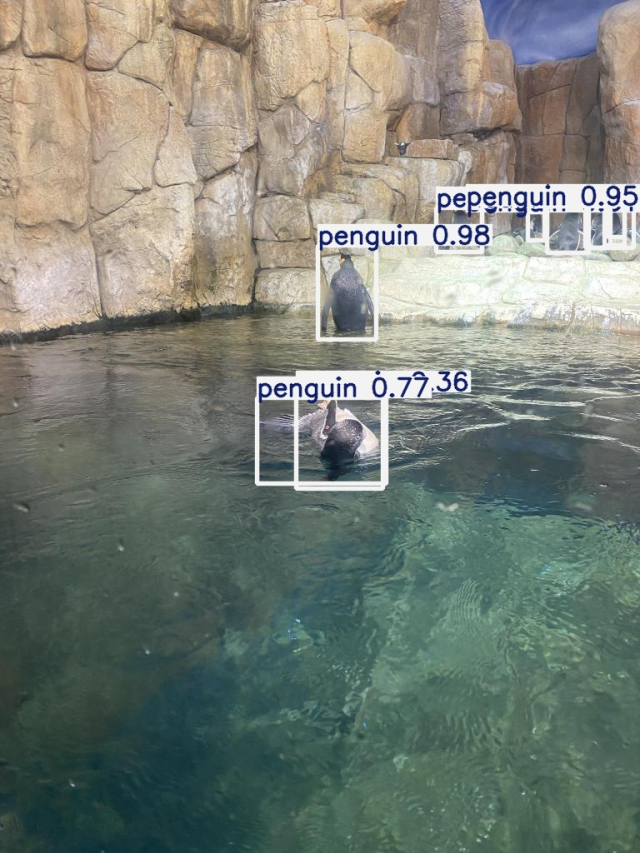

In [ ]:
# 예측 이미지 확인
img=cv2.imread('/content/runs/detect/train22/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg')
fix_width=640
height,width=img.shape[:2]
ratio=fix_width / width
demension=(fix_width, int(height*ratio))
img=cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

In [ ]:
# results=model.predict(source='/content/test/images/', save=True)

# 학습된 모델 가중치

In [ ]:
f_model=YOLO('/content/runs/detect/train2/weights/best.pt')

In [ ]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(f_model.names), len(f_model.names))

# 모델이 분류할 수 있는 부류 확인
print(f_model.names)

<class 'dict'> 7
{0: 'fish', 1: 'jellyfish', 2: 'penguin', 3: 'puffin', 4: 'shark', 5: 'starfish', 6: 'stingray'}


In [ ]:
f_results=f_model.predict(source='/content/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg', save=True)


image 1/1 /content/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg: 640x480 10 penguins, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
